In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
disease_df = pd.read_csv("heart_disease_data.csv")
disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
disease_df.shape

(303, 14)

In [4]:
disease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
disease_df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [6]:
disease_df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [7]:
disease_df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [8]:
disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='sex', ylabel='target'>

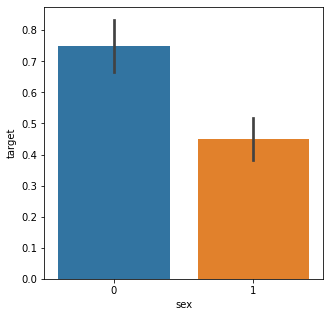

In [9]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='sex', y = 'target', data = disease_df)

<AxesSubplot:xlabel='cp', ylabel='target'>

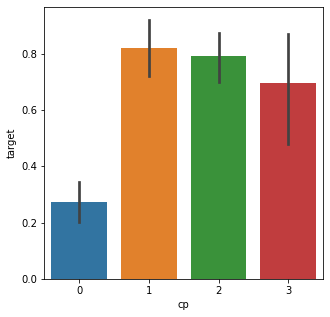

In [10]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='cp', y = 'target', data = disease_df)

In [11]:
# CORRELATION POSITIVE OR NEGATIVE
correlation = disease_df.corr()

<AxesSubplot:>

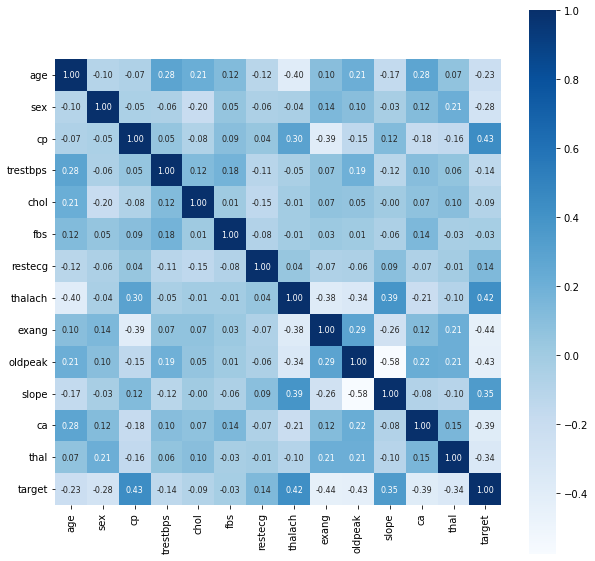

In [12]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [13]:
X=disease_df.drop('target',axis=1)
Y=disease_df['target']

In [14]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [15]:
# Splitting into Train and Test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=5)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [17]:
model_lr = LogisticRegression()

In [18]:
print(X_train)
print(Y_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
89    58    0   0       100   248    0        0      122      0      1.0   
88    54    0   2       110   214    0        1      158      0      1.6   
218   65    1   0       135   254    0        0      127      0      2.8   
280   42    1   0       136   315    0        1      125      1      1.8   
185   44    1   0       112   290    0        0      153      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
20    59    1   0       135   234    0        1      161      0      0.5   
254   59    1   3       160   273    0        0      125      0      0.0   
17    66    0   3       150   226    0        1      114      0      2.6   
187   54    1   0       124   266    0        0      109      1      2.2   
287   57    1   1       154   232    0        0      164      0      0.0   

     slope  ca  thal  
89       1   0     2  
88       1   0     2  
218      1   1    

In [19]:
#training the logistic Regression model with training data
model_lr.fit(X_train,Y_train)

C:\Users\amank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#Logistic Regression Training
X_train_prediction_lr = model_lr.predict(X_train)
X_accuracy_lr1 = accuracy_score(X_train_prediction_lr,Y_train)

print("Accuracy of training data using Logistic Regression is : ",X_accuracy_lr1)
p=[]
p.append('---Logistic_Regression---')
p.append(X_accuracy_lr1)

Accuracy of training data using Logistic Regression is :  0.8471074380165289


In [21]:
#Logistic Regression Testing
X_test_prediction_lr = model_lr.predict(X_test)
X_accuracy_lr2 = accuracy_score(X_test_prediction_lr,Y_test)

print("Accuracy of training data using Logistic Regression is : ",X_accuracy_lr2)
p.append(X_accuracy_lr2)

Accuracy of training data using Logistic Regression is :  0.8524590163934426


In [22]:
# R squared
from sklearn import metrics
R2_score = metrics.r2_score(Y_train, X_train_prediction_lr)
print("R squared  : ", R2_score)

R squared  :  0.3833333333333333


In [23]:
F1_score = metrics.f1_score(Y_train, X_train_prediction_lr)
print(F1_score)

0.8683274021352313


In [24]:
# SVM
model_svm = svm.SVC(kernel='linear')

In [25]:
#training the SVM classifier
model_svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [26]:
#Model Evaluation training
X_train_prediction_svm = model_svm.predict(X_train)
X_accuracy_svm1 = accuracy_score(X_train_prediction_svm,Y_train)
print("Accuracy of the training data using SVM is : ",X_accuracy_svm1)

p.append('---Support Vector Machine---')
p.append(X_accuracy_svm1)

Accuracy of the training data using SVM is :  0.8471074380165289


In [27]:
#Model Evaluation testing
X_test_prediction_svm = model_svm.predict(X_test)
X_accuracy_svm2 = accuracy_score(X_test_prediction_svm,Y_test)
print("Accuracy of the testing data using SVM is : ",X_accuracy_svm2)

p.append(X_accuracy_svm2)

Accuracy of the testing data using SVM is :  0.819672131147541


In [28]:
# R squared
from sklearn import metrics
R2_score = metrics.r2_score(Y_train, X_train_prediction_svm)
print("R squared  : ", R2_score)

R squared  :  0.3833333333333333


In [29]:
F1_score = metrics.f1_score(Y_train, X_train_prediction_svm)
print(F1_score)

0.8692579505300353


In [30]:
# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=60)

In [31]:
model_rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=60)

In [32]:
# Accuracy Scores using training Randomforest Classifier
X_train_prediction_rf = model_rf.predict(X_train)
X_accuracy_rf1 = accuracy_score(X_train_prediction_rf, Y_train)

print("Accuracy of the training data using Random Forest is : ",X_accuracy_rf1)

p.append('---Random Forest Classifier---')
p.append(X_accuracy_rf1)

Accuracy of the training data using Random Forest is :  1.0


In [33]:
# Accuracy Scores using testing Randomforest Classifier
X_test_prediction_rf = model_rf.predict(X_test)
X_accuracy_rf2 = accuracy_score(X_test_prediction_rf, Y_test)

print("Accuracy of the testing data using Random Forest is : ",X_accuracy_rf2)


p.append(X_accuracy_rf2)

Accuracy of the testing data using Random Forest is :  0.7540983606557377


In [34]:
for i in p:
    print(i)

---Logistic_Regression---
0.8471074380165289
0.8524590163934426
---Support Vector Machine---
0.8471074380165289
0.819672131147541
---Random Forest Classifier---
1.0
0.7540983606557377


In [36]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
